In [3]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline    
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from matplotlib.colors import ListedColormap
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics
df = pd.read_csv(r"C:\Users\HP\Downloads\archive (5)\spam.csv", encoding='latin1')
df.head(20) # check head 

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
df=df.iloc[:,[0,1]] # drop the last two na columns which are not useful for our task too
df.head(10)
df.columns = ['Spam or Ham','Text'] # rename columns 
df.head()

,Spam or Ham,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Spam or Ham  5572 non-null   object
 1   Text         5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [7]:
df.describe()

,Spam or Ham,Text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


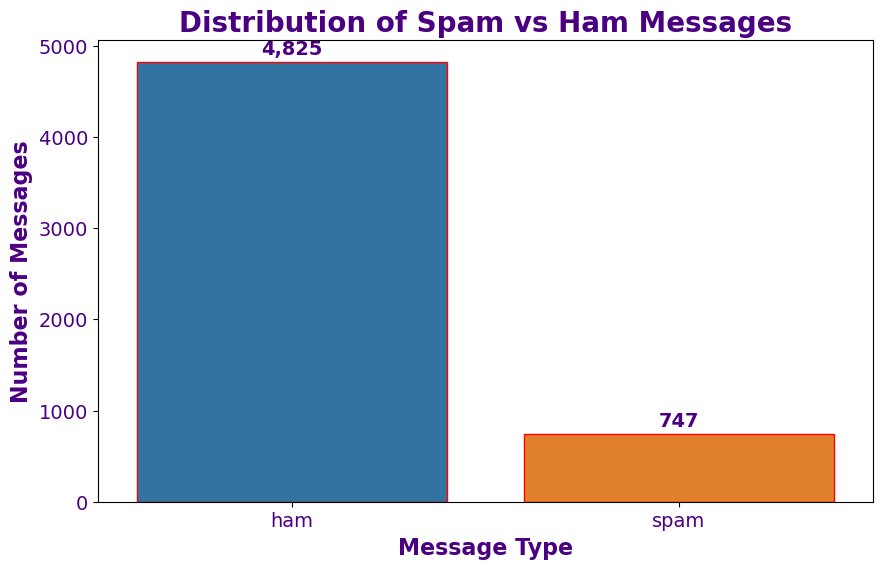

In [8]:
colors = ["#1F77B4", "#FF7F0E"] 


plt.figure(figsize=(10, 6))

sns.countplot(x=df["Spam or Ham"], palette=colors, edgecolor="red")

# Customize plot aesthetics
plt.title("Distribution of Spam vs Ham Messages", fontsize=20, fontweight='bold', color="#4B0082")
plt.xlabel("Message Type", fontsize=16, fontweight='bold', color="#4B0082")
plt.ylabel("Number of Messages", fontsize=16, fontweight='bold', color="#4B0082")
plt.xticks(fontsize=14, color='#4B0082')
plt.yticks(fontsize=14, color='#4B0082')

# Add value labels on the bars
for p in plt.gca().patches:
    plt.gca().annotate(f"{int(p.get_height()):,}", 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', 
                       xytext=(0, 9), 
                       textcoords='offset points',
                       color="#4B0082", fontsize=14, fontweight='bold')

# Show the plot
plt.show()

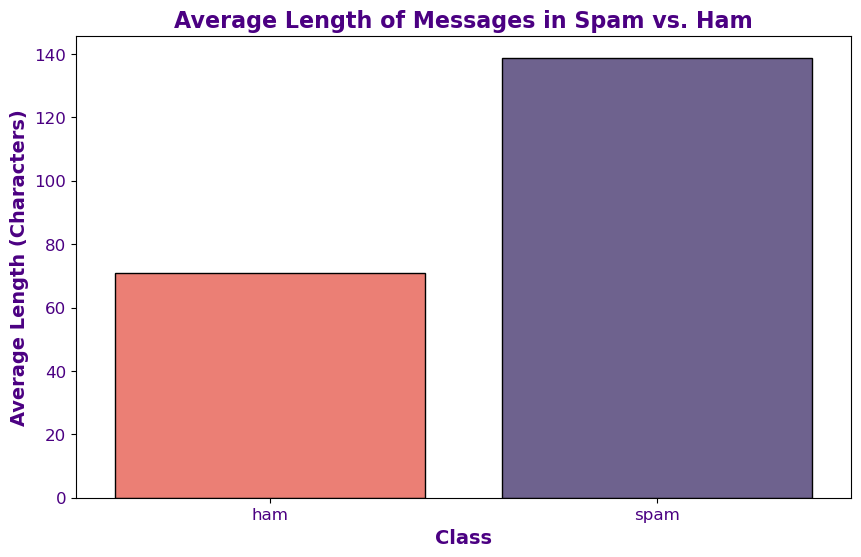

In [9]:
palette = ["#FF6F61", "#6B5B95"] 
df['Text_Length'] = df['Text'].apply(len)
average_length = df.groupby('Spam or Ham')['Text_Length'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Spam or Ham', y='Text_Length', data=average_length, palette=palette, edgecolor='black')
plt.title('Average Length of Messages in Spam vs. Ham', fontsize=16, color='#4B0082', fontweight='bold')
plt.xlabel('Class', fontsize=14, color='#4B0082', fontweight='bold')
plt.ylabel('Average Length (Characters)', fontsize=14, color='#4B0082', fontweight='bold')
plt.xticks(fontsize=12, color='#4B0082')
plt.yticks(fontsize=12, color='#4B0082')
plt.show()

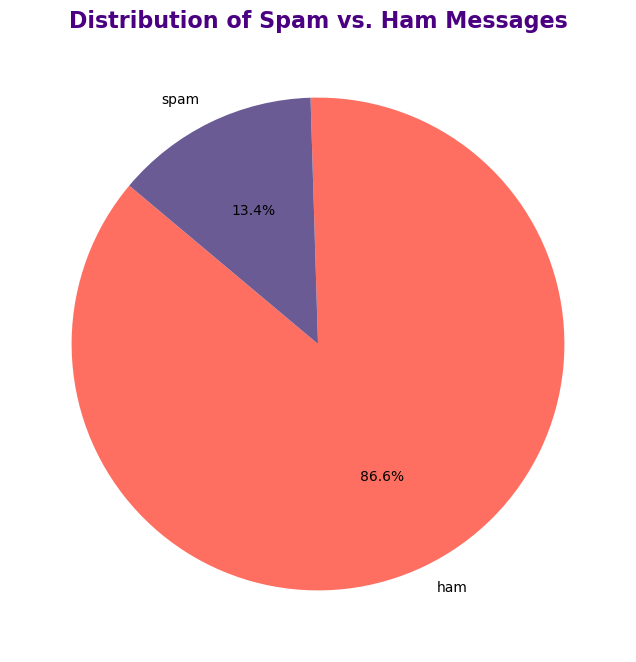

In [10]:
counts = df['Spam or Ham'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', colors=palette, startangle=140)
plt.title('Distribution of Spam vs. Ham Messages', fontsize=16, color='#4B0082', fontweight='bold')
plt.show()


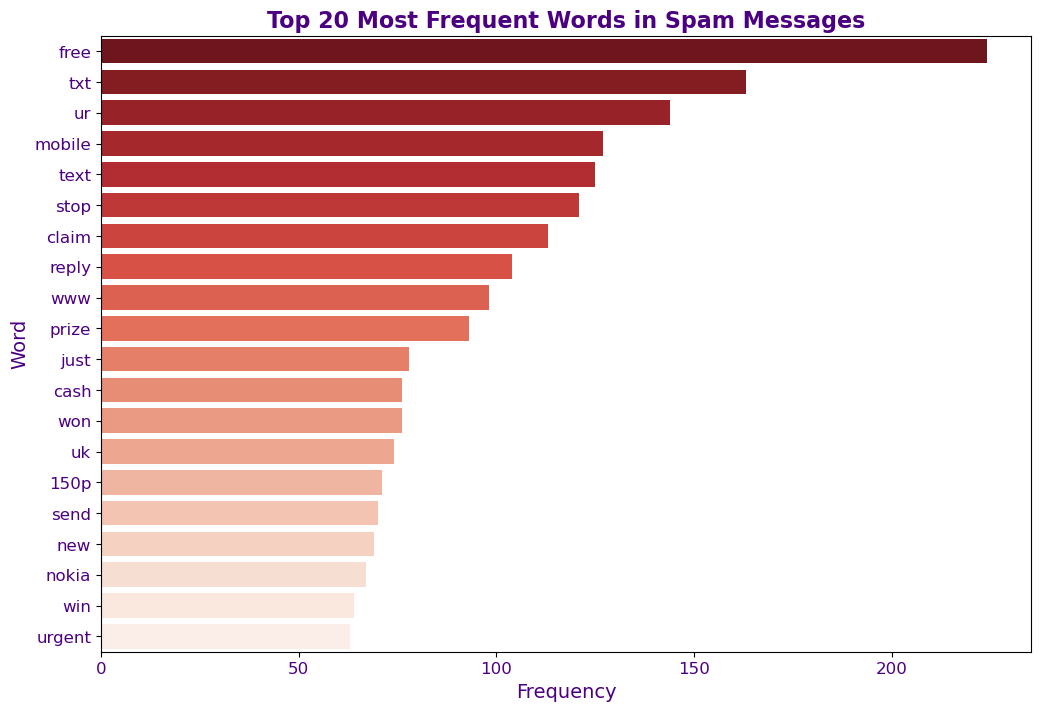

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
spam_texts = df[df['Spam or Ham'] == 'spam']['Text']
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(spam_texts)
word_freq = X.sum(axis=0)
words = vectorizer.get_feature_names_out()
word_freq_df = pd.DataFrame({'Word': words, 'Frequency': word_freq.flat})
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False).head(20)
plt.figure(figsize=(12, 8))
sns.barplot(x='Frequency', y='Word', data=word_freq_df, palette='Reds_r')
plt.title('Top 20 Most Frequent Words in Spam Messages', fontsize=16, fontweight='bold', color='#4B0082')
plt.xlabel('Frequency', fontsize=14, color='#4B0082')
plt.ylabel('Word', fontsize=14, color='#4B0082')
plt.xticks(fontsize=12, color='#4B0082')
plt.yticks(fontsize=12, color='#4B0082')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


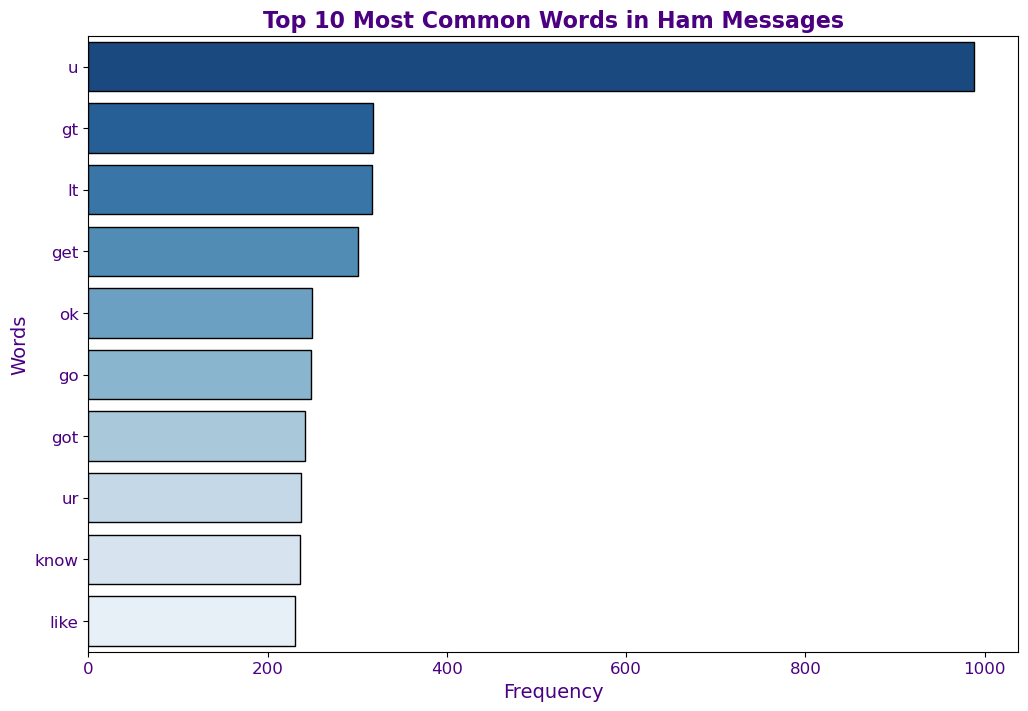

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
ham_texts = df[df['Spam or Ham'] == 'ham']['Text']
ham_words = ' '.join(ham_texts)
ham_tokens = nltk.word_tokenize(ham_words)
filtered_words = [word.lower() for word in ham_tokens if word.isalpha() and word.lower() not in stop_words]
word_freq = Counter(filtered_words)
most_common_words = word_freq.most_common(10)
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='Blues_r', edgecolor='black')
plt.title('Top 10 Most Common Words in Ham Messages', fontsize=16, fontweight='bold', color='#4B0082')
plt.xlabel('Frequency', fontsize=14, color='#4B0082')
plt.ylabel('Words', fontsize=14, color='#4B0082')
plt.xticks(fontsize=12, color='#4B0082')
plt.yticks(fontsize=12, color='#4B0082')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


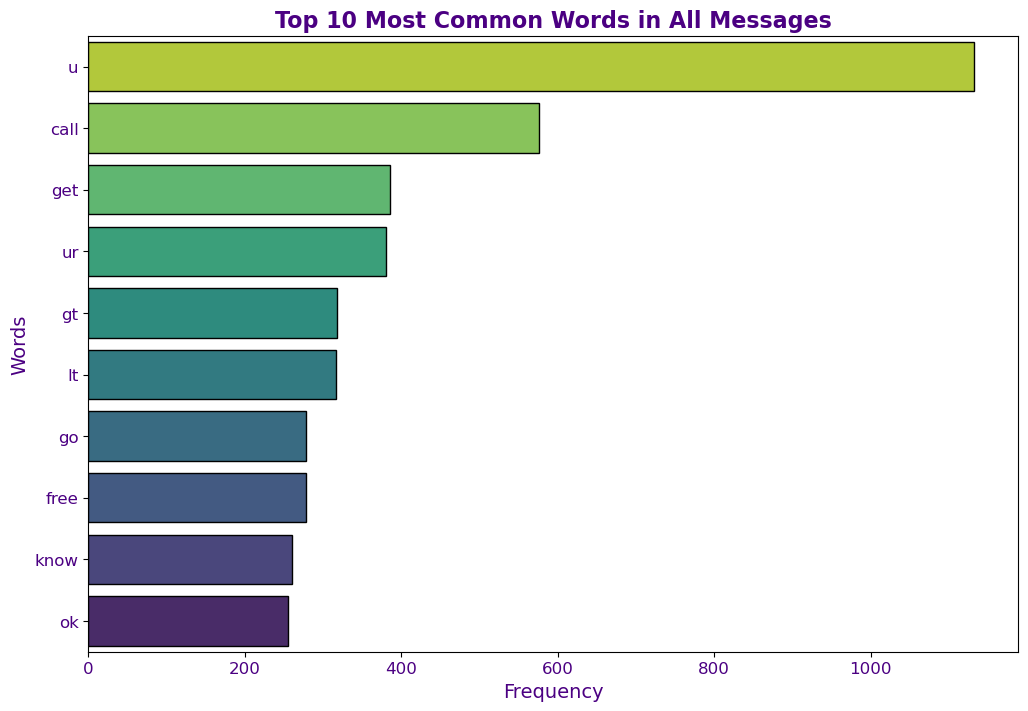

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
all_texts = ' '.join(df['Text'])
all_tokens = nltk.word_tokenize(all_texts)
filtered_words = [word.lower() for word in all_tokens if word.isalpha() and word.lower() not in stop_words]
word_freq = Counter(filtered_words)
most_common_words = word_freq.most_common(10)
words, counts = zip(*most_common_words)
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(words), palette='viridis_r', edgecolor='black')
plt.title('Top 10 Most Common Words in All Messages', fontsize=16, fontweight='bold', color='#4B0082')
plt.xlabel('Frequency', fontsize=14, color='#4B0082')
plt.ylabel('Words', fontsize=14, color='#4B0082')
plt.xticks(fontsize=12, color='#4B0082')
plt.yticks(fontsize=12, color='#4B0082')
plt.show()


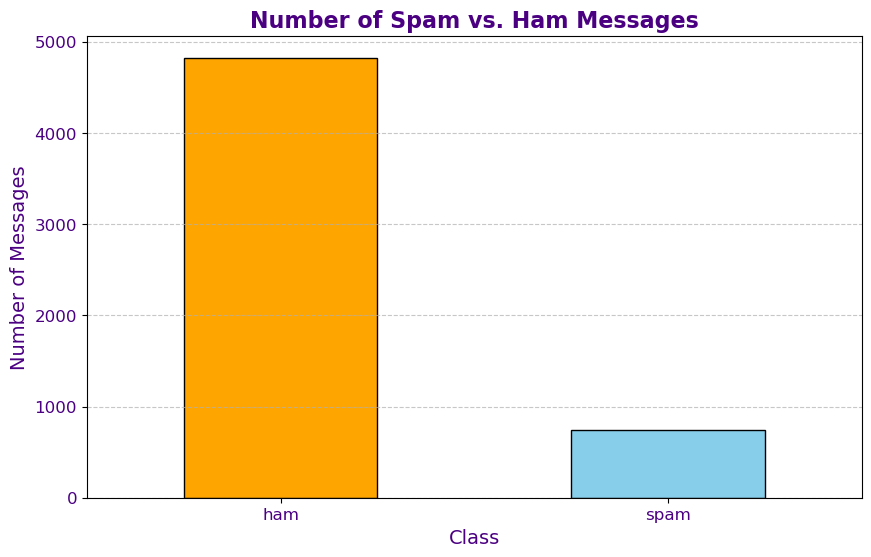

In [14]:
colors = ['#FFA500', '#87CEEB']
class_counts = df['Spam or Ham'].value_counts()
plt.figure(figsize=(10, 6))
class_counts.plot(kind='bar', color=colors, edgecolor='black')
plt.title('Number of Spam vs. Ham Messages', fontsize=16, fontweight='bold', color='#4B0082')
plt.xlabel('Class', fontsize=14, color='#4B0082')
plt.ylabel('Number of Messages', fontsize=14, color='#4B0082')
plt.xticks(rotation=0, fontsize=12, color='#4B0082')
plt.yticks(fontsize=12, color='#4B0082')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

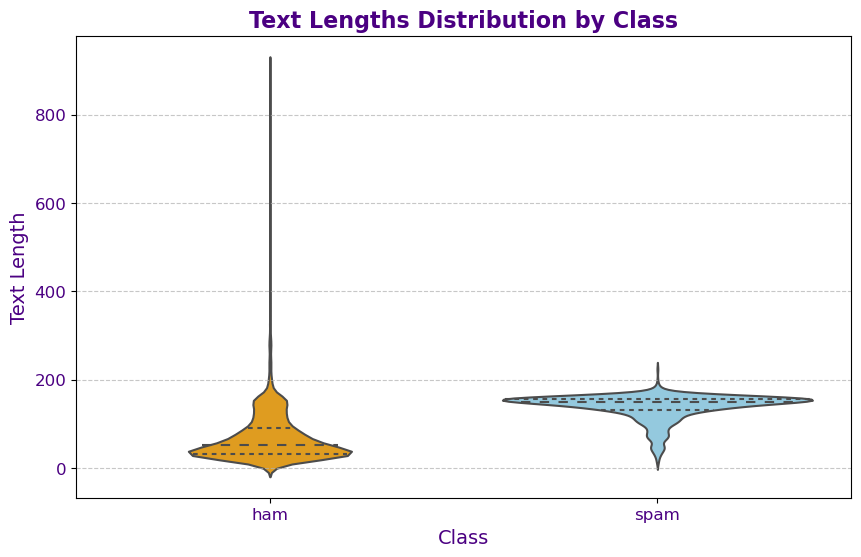

In [15]:
colors = ['#FFA500', '#87CEEB']
plt.figure(figsize=(10, 6))
sns.violinplot(x='Spam or Ham', y='Text_Length', data=df, palette=colors, inner='quartile')
plt.title('Text Lengths Distribution by Class', fontsize=16, fontweight='bold', color='#4B0082')
plt.xlabel('Class', fontsize=14, color='#4B0082')
plt.ylabel('Text Length', fontsize=14, color='#4B0082')
plt.xticks(fontsize=12, color='#4B0082')
plt.yticks(fontsize=12, color='#4B0082')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Text(0.5, 1.0, 'Top 10')

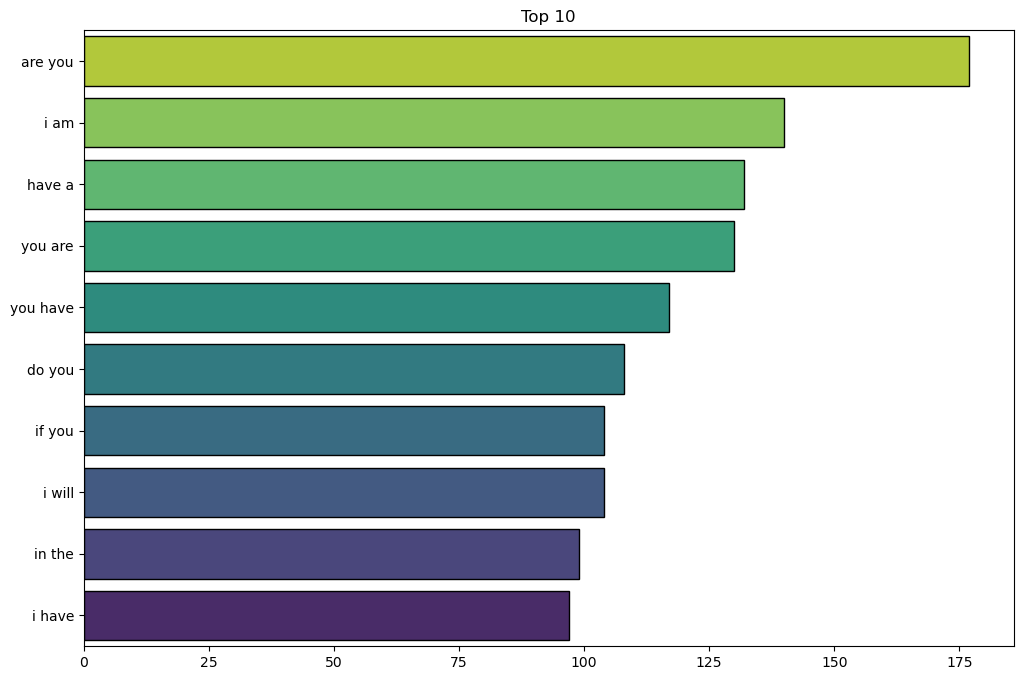

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from nltk import bigrams
from nltk import FreqDist
import nltk
nltk.download('punkt')

# Tokenize the texts and generate bigrams
all_bigrams = [bigram for text in df['Text'] for bigram in bigrams(nltk.word_tokenize(text.lower())) if bigram[0].isalpha() and bigram[1].isalpha()]

# Get the most common bigrams
bigram_freq = FreqDist(all_bigrams)
most_common_bigrams = bigram_freq.most_common(10)

# Unpack the most common bigrams and their counts
bigrams, counts = zip(*most_common_bigrams)
bigram_labels = [' '.join(bigram) for bigram in bigrams]

# Plot the most common bigrams
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=bigram_labels, palette='viridis_r', edgecolor='black')
plt.title('Top 10')

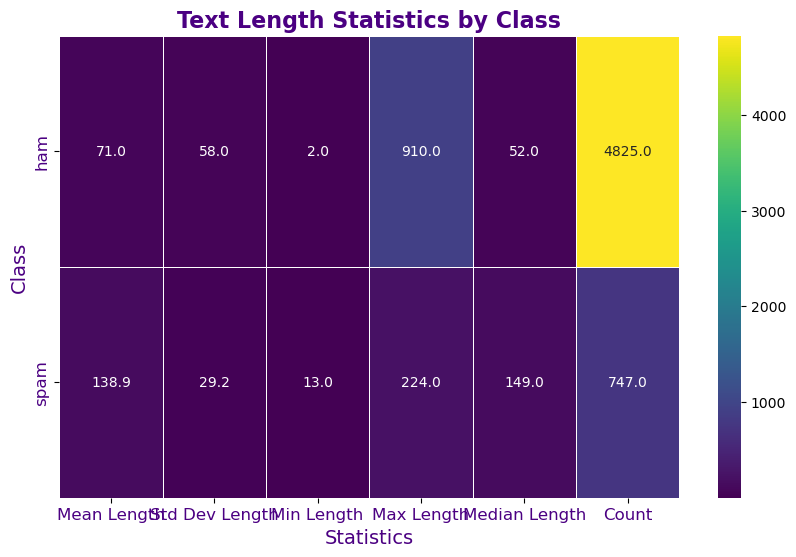

In [17]:
text_stats = df.groupby('Spam or Ham')['Text_Length'].agg(['mean', 'std', 'min', 'max', 'median', 'count']).reset_index()
text_stats.columns = ['Class', 'Mean Length', 'Std Dev Length', 'Min Length', 'Max Length', 'Median Length', 'Count']
plt.figure(figsize=(10, 6))
sns.heatmap(text_stats.set_index('Class'), annot=True, cmap='viridis', fmt='.1f', linewidths=.5)
plt.title('Text Length Statistics by Class', fontsize=16, fontweight='bold', color='#4B0082')
plt.xlabel('Statistics', fontsize=14, color='#4B0082')
plt.ylabel('Class', fontsize=14, color='#4B0082')
plt.xticks(fontsize=12, color='#4B0082')
plt.yticks(fontsize=12, color='#4B0082')
plt.show()
